In [247]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


In [248]:
#Setting up data generators
#Create a CLAHE object with desired parameters

train_dir = 'Dataset/Train/'
test_dir = 'Dataset/Test'
val_dir = 'Dataset/Validation'


def apply_clahe(img):
    # Convert to grayscale and convert data type to 8-bit unsigned integer
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.uint8)

    # Apply CLAHE to the image
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(gray)

    # Convert back to RGB
    img_rgb = cv2.cvtColor(img_clahe, cv2.COLOR_GRAY2RGB)

    return img_rgb


train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=apply_clahe
)

val_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 937 images belonging to 5 classes.
Found 303 images belonging to 5 classes.


In [249]:
#Setting up the model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Dense, Dropout, Activation, Flatten


model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


In [250]:
#Compliling the model
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [251]:
#Early stopping to avoid overfitting of mode
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [252]:
#Training model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG16

# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# Model architecture
vgg = VGG16(include_top=False, input_shape=(150, 150, 3))  #check input shape

model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  #//number according to nr of classes and I changed the activation to softmax

vgg.trainable = False

# Model training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
        train_generator,
        steps_per_epoch=300//16,
        epochs=20)
#add validation split as parameter

Found 937 images belonging to 5 classes.
Epoch 1/20
18/18 [==============================] - 17s 860ms/step - loss: -9.1383 - accuracy: 0.2066
Epoch 2/20
18/18 [==============================] - 16s 855ms/step - loss: -28.0913 - accuracy: 0.1953
Epoch 3/20
18/18 [==============================] - 15s 859ms/step - loss: -48.9874 - accuracy: 0.1881
Epoch 4/20
18/18 [==============================] - 16s 869ms/step - loss: -63.9484 - accuracy: 0.2080
Epoch 5/20
18/18 [==============================] - 16s 880ms/step - loss: -83.0504 - accuracy: 0.1944
Epoch 6/20
18/18 [==============================] - 16s 849ms/step - loss: -108.7265 - accuracy: 0.1979
Epoch 7/20
18/18 [==============================] - 16s 853ms/step - loss: -117.8840 - accuracy: 0.1979
Epoch 8/20
18/18 [==============================] - 16s 848ms/step - loss: -138.6859 - accuracy: 0.2049
Epoch 9/20
18/18 [==============================] - 15s 837ms/step - loss: -156.0679 - accuracy: 0.2134
Epoch 10/20
18/18 [==========

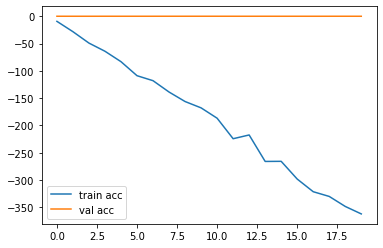

KeyError: 'val_loss'

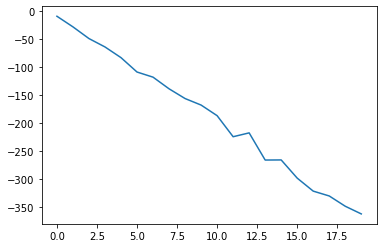

In [257]:
plt.plot(history.history['loss'], label='train acc')

plt.plot(history.history['accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()


plt.savefig('vgg-loss-rps-1.png')
